### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

In [2]:
# Import packages

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

In [3]:
# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")

# Display first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [8]:
# Rename columns as needed
df0 = df0.rename(columns = {'time_spend_company':'tenure', 'Department':'department', 
                           'average_montly_hours':'avg_monthly_hours', 'Work_accident':'work_accident'})

# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'avg_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [9]:
# Check for missing values
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
avg_monthly_hours        0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [10]:
# Check for duplicates
df0.duplicated().sum()

3008

In [11]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,avg_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [12]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
df1.head()

,satisfaction_level,last_evaluation,number_project,avg_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


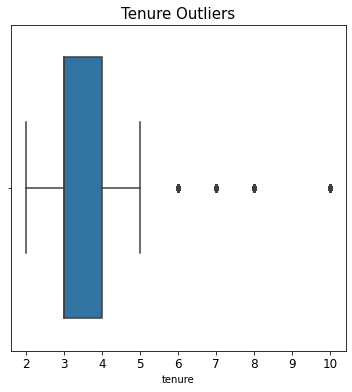

In [13]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers

plt.figure(figsize=(6,6))
sns.boxplot(x=df1['tenure'])
plt.title('Tenure Outliers',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [14]:
# Determine the number of rows containing outliers

# Compute the 25th percentile value in `tenure`
percentile25 = df1['tenure'].quantile(0.25)

# Compute the 75th percentile value in `tenure`
percentile75 = df1['tenure'].quantile(0.75)

# Compute the interquartile range in `tenure`
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `tenure`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `tenure`
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

# Count how many rows in the data contain outliers in `tenure`
print("Number of rows in the data containing outliers in `tenure`:", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 824


In [15]:
# Get numbers of people who left vs. stayed
print(df1['left'].value_counts())
# Get percentages of people who left vs. stayed
print(df1['left'].value_counts(normalize=True))

0    10000
1     1991
Name: left, dtype: int64
0    0.833959
1    0.166041
Name: left, dtype: float64


### Visualizations

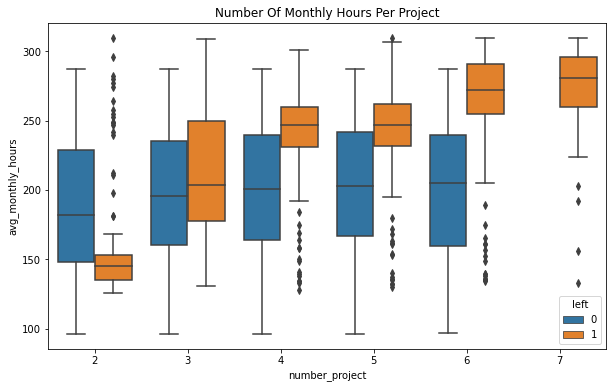

In [16]:
# Box plot showing average monthly hours for the number of projects each employee worked on comparing those who left vs stayed
plt.figure(figsize = (10,6))
plt.title('Number Of Monthly Hours Per Project')
sns.boxplot(y = df1['avg_monthly_hours'], x = df1['number_project'], hue = df1['left'])
plt.show()

The boxplot shows that the more projects an employee worked on the higher their average monthly hours which makes sense but there are some key points to note. 

Firstly there is a group of former employees who worked considerably less hours than their peers and were not assigned to many projects, this could be for a number of different reasons. These employees could have perhaps been interns or student employees who were limited in the available hours or projects and were expected to be leaving the company.

All employees who were assigned 7 projects worked an enormous amount of monthly hours and ALL left, this can be due to them being overworked. The same can be seen for those who left after having worked on 6 projects.

In [17]:
# Assuming that a full-time employee works 40 hours a week and has a few weeks of vacation a year

HoursPerMonth = (40 * 50) / 12
print(f'The average monthly hours for a full-time employee is {HoursPerMonth}')

The average monthly hours for a full-time employee is 166.66666666666666


Considering that 166.67 hours a month is standard for an employee it is clear to see that the employees at Salifort Motors are overworked. 

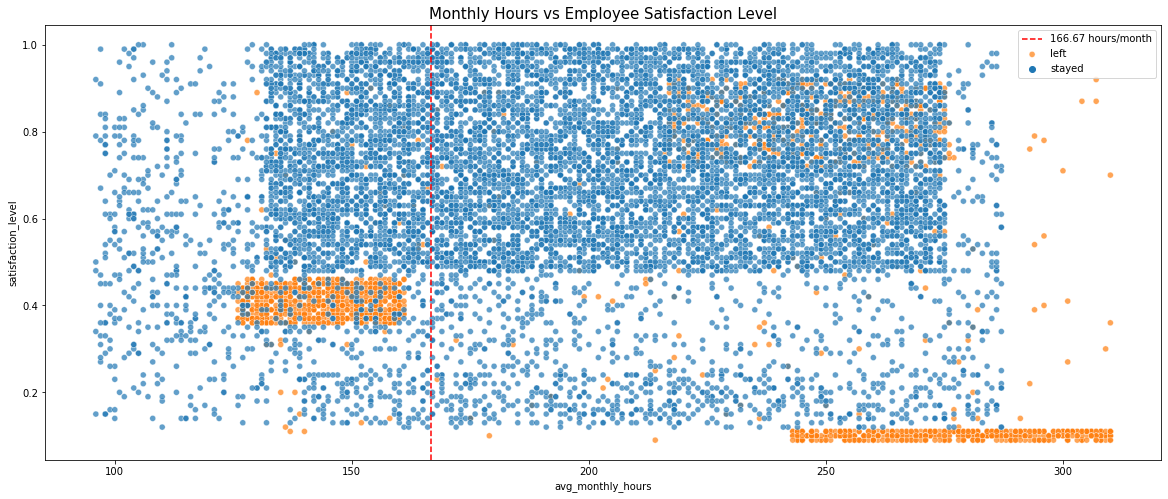

In [18]:
# Scatterplot showing employees average monthly hours vs their satisfaction level with Salifort Motors
plt.figure(figsize = (20, 8))
sns.scatterplot(x = df1['avg_monthly_hours'], y = df1['satisfaction_level'], hue = df1['left'], alpha = 0.7)
plt.axvline(x = 166.67, color = 'red', label = '166.67 hours/month', ls = '--')
plt.legend(labels = ['166.67 hours/month', 'left', 'stayed'])
plt.title('Monthly Hours vs Employee Satisfaction Level', fontsize = '15')
plt.show()

The scatterplot shows that those employees with the lowest satisfaction level were those who worked the most hours. The long work hours is a likely cause for their satisfaction level being close to 0. 

There is a group of employees who left the company yet they worked less than the 166.67 hours a month mark we deemed to be standard. This group's satisfaction level hovered around 0.4, maybe they felt pressured to work more hours like their peers and this impacted their satisfaction level.

A third group of employees worked ~215-275 hours a month yet had a satisfation level of around 0.7 to 0.9, with some leaving and some staying.

Over all the shape and distributions of this scatterplot are a little strange.

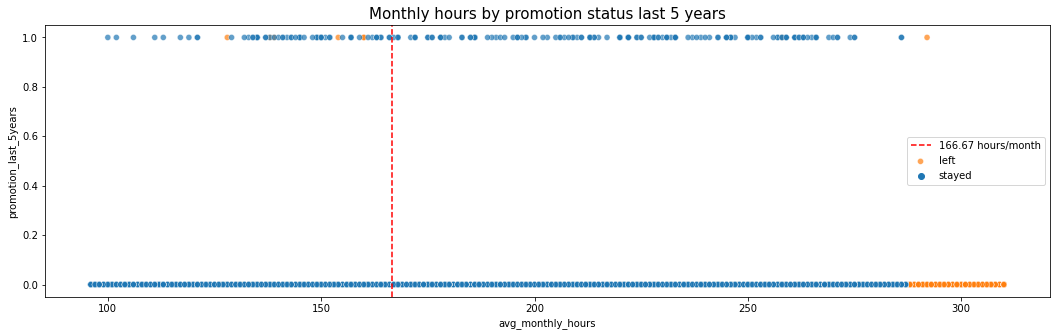

In [19]:
# Scatterplot showcasing employees average monthly hours vs promotion status (within last 5 years)

plt.figure(figsize = (18,5))
sns.scatterplot(data = df1, x = 'avg_monthly_hours', y = 'promotion_last_5years', hue = 'left', alpha = 0.7)
plt.axvline(x = 166.67, color = 'red', label = '166.67 hours/month', ls = '--')
plt.legend(labels=['166.67 hours/month', 'left', 'stayed'])
plt.title('Monthly hours by promotion status last 5 years', fontsize = '15');

This scatterplot showcases some interesting points:
There is a very small number of employees that were promoted in the last 5 years who left the company.
The employees who put in the most hours weren't promoted. 
The vast majority of employees who left were those who worked the most hours.

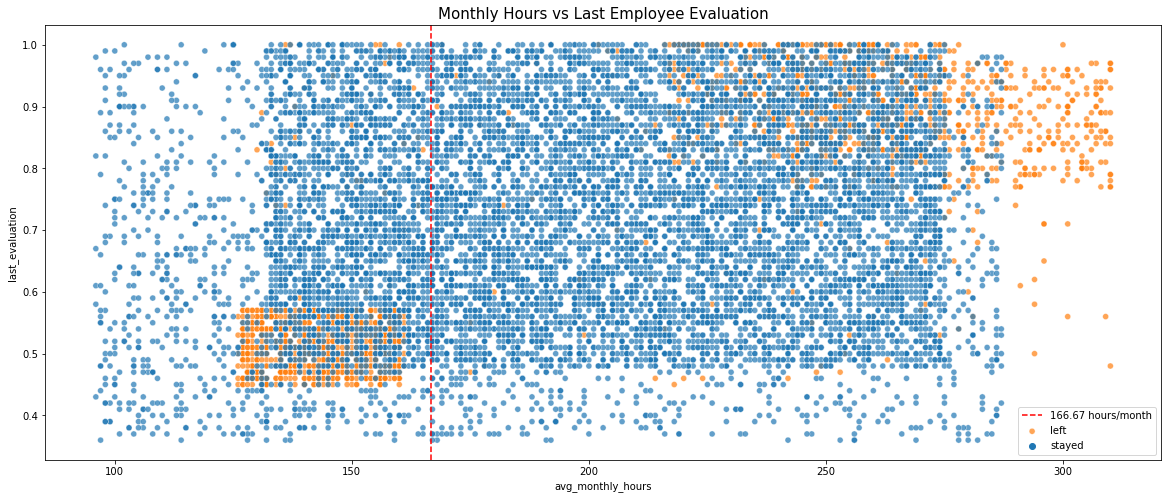

In [20]:
# Scatterplot showing employees average monthly hours vs their last evaluation
plt.figure(figsize = (20, 8))
sns.scatterplot(x = df1['avg_monthly_hours'], y = df1['last_evaluation'], hue = df1['left'], alpha = 0.7)
plt.axvline(x = 166.67, color = 'red', label = '166.67 hours/month', ls = '--')
plt.legend(labels = ['166.67 hours/month', 'left', 'stayed'])
plt.title('Monthly Hours vs Last Employee Evaluation', fontsize = '15')
plt.show()

When looking at this scatterplot the employees who have left Salifort Motors can be split into two groups, those who worked less than the standard 166.67 hours a month with a low evaluation score and those who worked significantly more than 166.67 hours a month with a high evaluation score.


Now that we have visualized some of the promotional & evaluation data this brings the question of pay and how it relates to employees choosing to stay vs leave Salifort Motors. 

Text(0.5, 1.0, 'Salary by tenure (long tenure)')

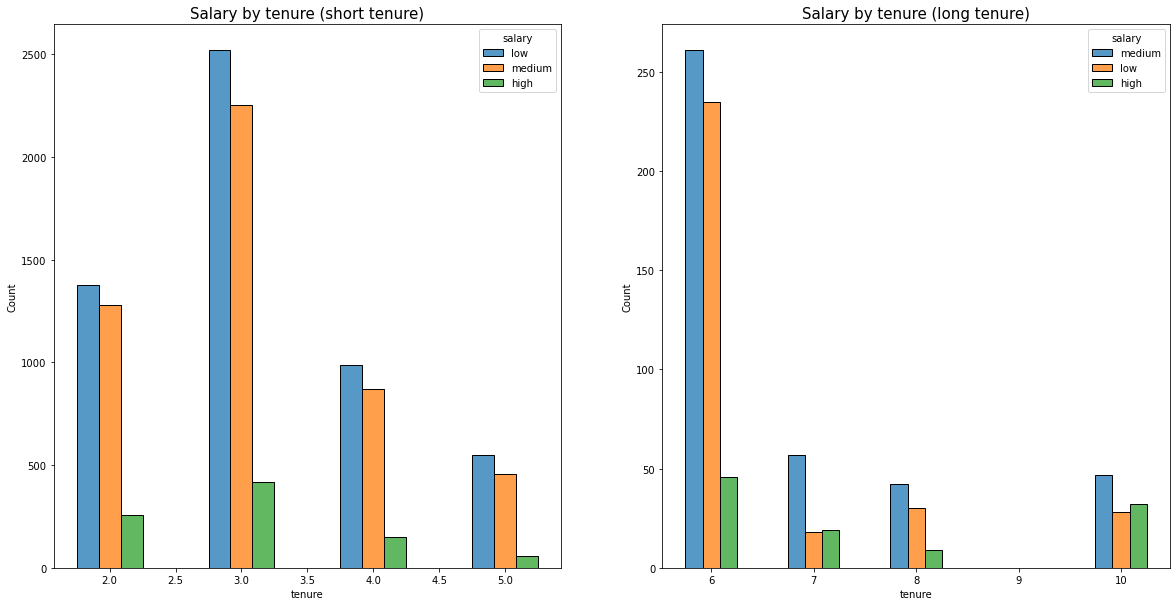

In [21]:
# Histogram showing salary status for both short and long tenured employees

short_tenure = df1[df1['tenure'] < 6]
long_tenure = df1[df1['tenure'] > 5]

fig, ax = plt.subplots(1,2, figsize = (20,10))


sns.histplot(data = short_tenure, x = 'tenure', hue = 'salary', multiple = 'dodge', discrete = 1,
            shrink = 0.5, ax=ax[0])
ax[0].set_title('Salary by tenure (short tenure)', fontsize='15')

sns.histplot(data = long_tenure, x = 'tenure', hue = 'salary', multiple = 'dodge', discrete = 1,
             shrink = 0.5, ax=ax[1])
ax[1].set_title('Salary by tenure (long tenure)', fontsize ='15')

The results of these histograms are not anything too surprising.

As can be seen in the earlier visualizations there is a large portion of employees who are working well above the standard amount of hours per month but is there a specific department that averages more hours than others?

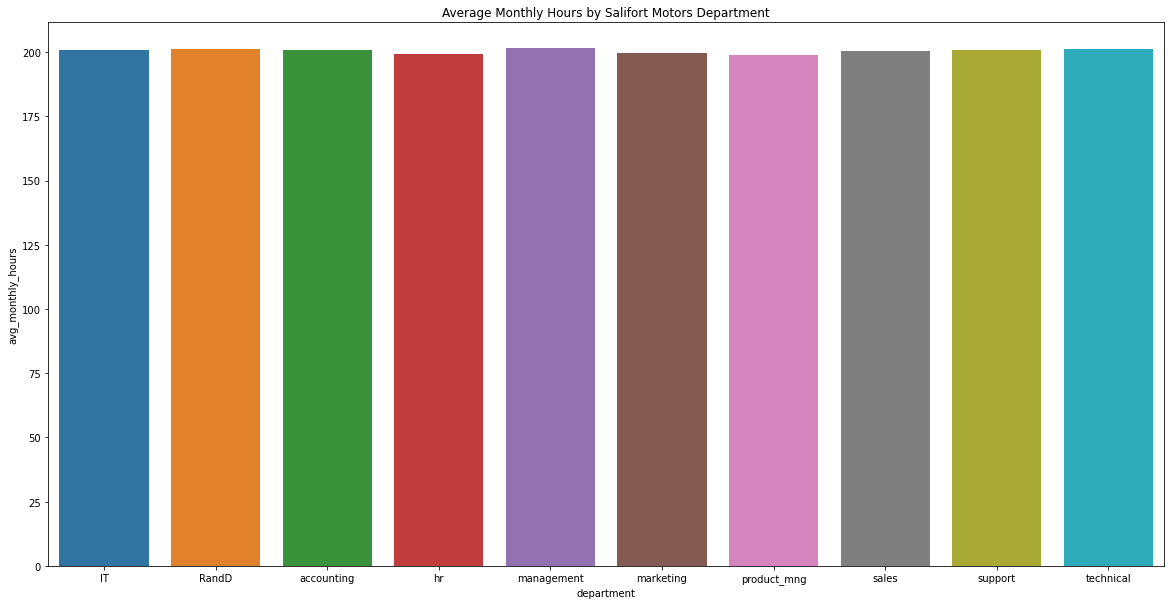

In [22]:
# Bar plot showing the average monthly hours per department at Salifort Motors

hours_per_department = df1.groupby('department')['avg_monthly_hours'].mean().reset_index()

plt.figure(figsize = (20,10))
sns.barplot(data = hours_per_department, x = 'department', y = 'avg_monthly_hours', ci = None)
plt.title('Average Monthly Hours by Salifort Motors Department')
plt.show()

It does not appear that any one particular department is being overworked and the large hours are standard across all departments and varies employee to employee.

Although the departments are on average working a similar amount of hours per month are the satisfaction levels of each department similar as well?

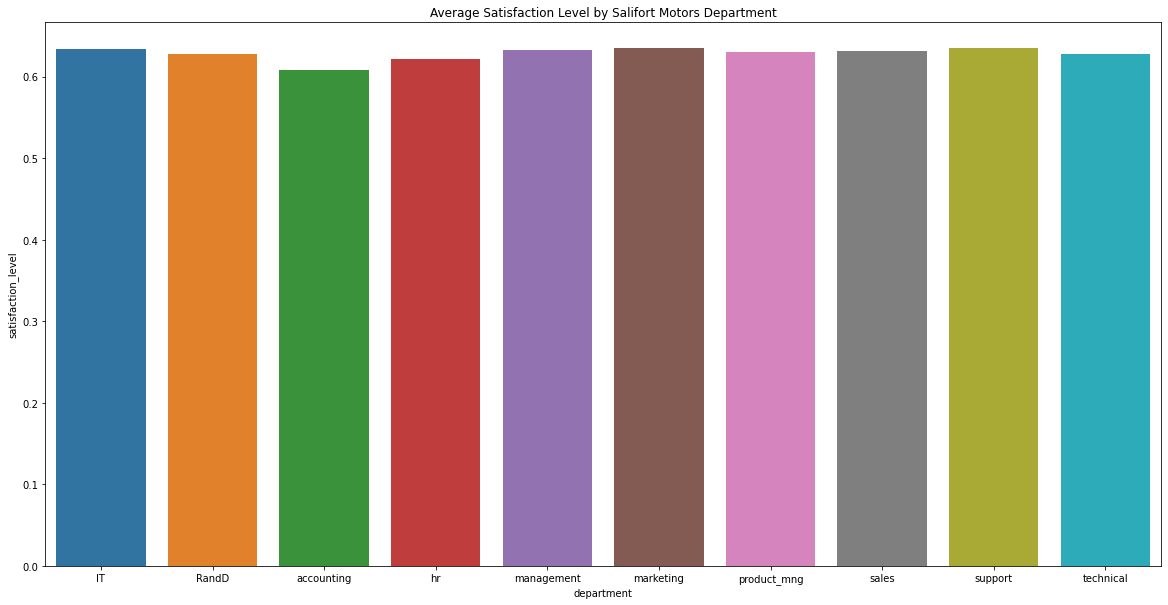

The average satisfaction level of employees at Salifort Motor is 0.6296580768909951.


In [23]:
# Bar plot showing the satisfaction level per department at Salifort Motors

satisfaction_per_department = df1.groupby('department')['satisfaction_level'].mean().reset_index()

plt.figure(figsize = (20,10))
sns.barplot(data = satisfaction_per_department, x = 'department', y = 'satisfaction_level', ci = None)
plt.title('Average Satisfaction Level by Salifort Motors Department')
plt.show()

avg_satisfaction_level = df1['satisfaction_level'].mean()
print(f'The average satisfaction level of employees at Salifort Motor is {avg_satisfaction_level}.')

All departments appear to have a similar average satisfaction level which is interesting. This is confirmed by calculating the average satisfaction level as a whole at Salifort Motors which is ~0.63. This means that there isn't a specific area within the company that is unsatisfied with Salifort Motors but much like averagre monthly hours it varies employee to employee.

Next let's create a heatmap to visualize any potential strong correlations between variables.

Text(0.5, 1.0, 'Correlation Heatmap')

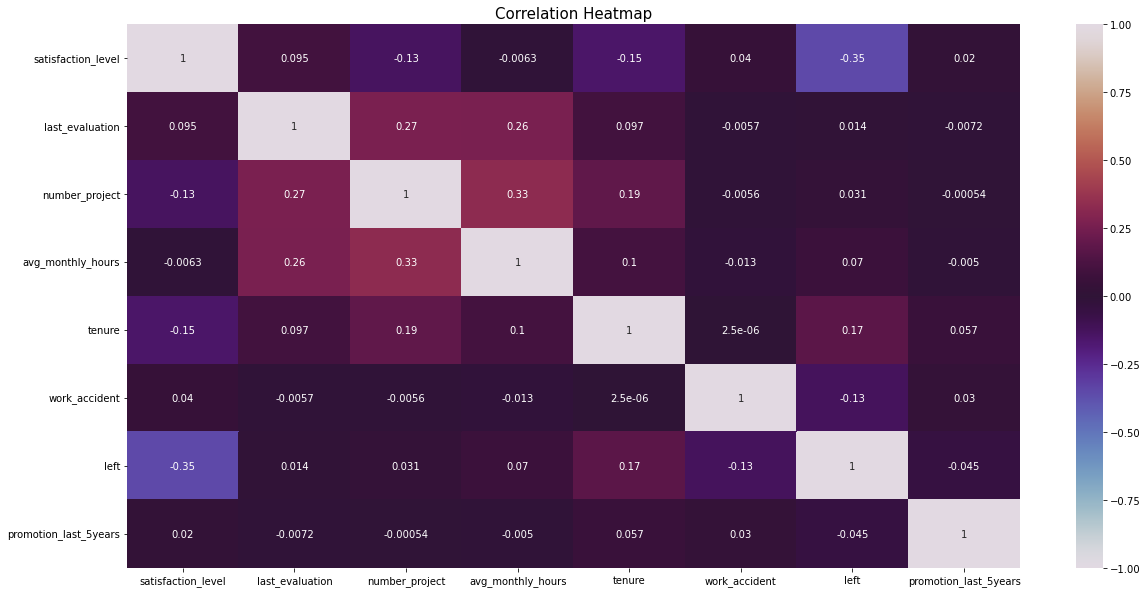

In [24]:
# Heatmap to show variable correlation

plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("twilight", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontsize = '15')

This heatmap allows us to see that some variables such as average monthly hours, evaulation score and number of projets all have some degree of positive correlation with each other. We also see that an employee choosing to leave and their satisfaction level are negatively correlated. 

### Insights

Overall there are some key insights we can derive from these visualizations, namely that employees at Salifort Motors are overworked and based on their satisfaction ratings underappreciated. After working extrememly large amounts of monthly hours employees are not getting promotions or evaluation scores they deem to be acceptable leading to them choosing to leave the company.

There is also another group of employees who have been with the company for many years and are still satisfied with working for Salifort Motors. 

Different working enivronments are suitable for some while not for others this can be the case here at Salifort Motors but I believe that the management team at Salifort Motors needs to take a look at what is causing the employees the need to work so many hours and if there is anything they can provide that will aid them in being more satisfied with their time at Salifort Motors.

### Model Building

We will be building a model to make a prediction on if an employee will stay or leave Salifort Motors therefore our prediction is based on a binary classification. Will the employee leave Salifort Motors? Yes or no.

There are a few possible models that will help us in completing our task, a linear regression model or machine learning models (tree-based). For this project we will be utilizing the latter and creating a machine learning model.

In [25]:
# Encode our categorical variables 

df_ML = df1.copy()

df_ML['salary'] = df_ML['salary'].astype('category').cat.set_categories(['low', 'medium', 'high']).cat.codes

df_ML = pd.get_dummies(df_ML, drop_first = False)

df_ML.head()

,satisfaction_level,last_evaluation,number_project,avg_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [26]:
# Isolate our desired variable
y = df_ML['left']

In [27]:
# Get our features (everything except out desired variable)
X = df_ML.drop('left', axis = 1)

In [28]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 42)

In [29]:
# Instantiating our first model (decision tree)
dec_tree = DecisionTreeClassifier(random_state=42)

# Define our desired hyperparameters
cv_params = {'max_depth':[4, 6, 8, 10, None],
             'min_samples_leaf': [2, 5, 3, 1],
             'min_samples_split': [2, 4, 6, 8]
             }

# Define our scoring metrics
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiating GridSearch
dec_tree1 = GridSearchCV(dec_tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [30]:
%%time
dec_tree1.fit(X_train,y_train)

CPU times: user 7.17 s, sys: 2.17 ms, total: 7.17 s
Wall time: 7.17 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, 10, None],
                     

In [31]:
# Finding the best parameters
dec_tree1.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [32]:
# Checking best AUC score
dec_tree1.best_score_

0.9758952535925409

In [33]:
# Creating a function that will provide the scoring metrics with the best mean of our desired metric

def metric_scores(chosen_model: str, model_object, chosen_metric: str):
        
        # Mapping our metric names to the actual names in GridSearchCV by creating a dictionary
        metric_mapping = {'auc' : 'mean_test_roc_auc', 'f1' : 'mean_test_f1',
                         'precision' : 'mean_test_precision', 'recall' : 'mean_test_recall',
                         'accuracy' : 'mean_test_accuracy'}
        
        # Creating a dataframe with the CV results
        GS_CV_results = pd.DataFrame(model_object.cv_results_)
        
        # Isolate the row from the dataframe with the max desired metric score
        best_estimator_results = GS_CV_results.iloc[GS_CV_results[metric_mapping[chosen_metric]].idxmax(), :]
        
        # Retrieving our scoring metrics from the isolated row
        auc = best_estimator_results.mean_test_roc_auc
        precision = best_estimator_results.mean_test_precision
        accuracy = best_estimator_results.mean_test_accuracy
        recall = best_estimator_results.mean_test_recall
        f1 = best_estimator_results.mean_test_f1
        
        # Creating a table for the results to display
        results_table = pd.DataFrame()
        results_table = pd.DataFrame({'model' : [chosen_model],
                                     'f1' : [f1],
                                     'precision' : [precision],
                                     'recall' : [recall],
                                     'accuracy' : [accuracy],
                                     'auc' : [auc]})
        
        return results_table

In [34]:
# Using the new function to get the scores from out decision tree grid search

dec_tree1_cv_results = metric_scores('Decision Tree 1 CV', dec_tree1, 'auc')
dec_tree1_cv_results

,model,f1,precision,recall,accuracy,auc
0,Decision Tree 1 CV,0.941941,0.966878,0.918288,0.981208,0.975895


These scores are a good indication that this decision tree model is capable of predicting if employees will leave very well. It is important to note that decicison tree models are susceptible to overfitting while random forest models combat that by using many trees to make predictions. 

Let's build a random forest model next and see what kind of scores that model will produce.

In [35]:
# Instantiating our second model (random forest)
rand_forest = RandomForestClassifier(random_state=42)

# Define our desired hyperparameters
cv_params = {'max_depth':[4.0, None],
             'min_samples_leaf': [1, 3, 2],
             'min_samples_split': [2, 4, 6],
             'max_samples': [0.5, 1.0],
             'max_features': [1.0],
             'n_estimators': [200, 400],
             }

# Define our scoring metrics
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiating GridSearch
rand_forest1 = GridSearchCV(rand_forest, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [36]:
%%time
rand_forest1.fit(X_train,y_train)

CPU times: user 4min 10s, sys: 484 ms, total: 4min 11s
Wall time: 4min 11s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [37]:
# Finding the best parameters
rand_forest1.best_params_

{'max_depth': 4.0,
 'max_features': 1.0,
 'max_samples': 0.5,
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 400}

In [38]:
# Checking best AUC score
rand_forest1.best_score_

0.9809366441580288

In [39]:
# Creating a results table for our random forest model and comparing it with our decision tree model
rand_forest1_cv_results = metric_scores('Random Forest CV', rand_forest1, 'auc')
print(dec_tree1_cv_results)
print(rand_forest1_cv_results)

                model        f1  precision    recall  accuracy       auc
0  Decision Tree 1 CV  0.941941   0.966878  0.918288  0.981208  0.975895
              model        f1  precision    recall  accuracy       auc
0  Random Forest CV  0.912972   0.915871  0.910247    0.9712  0.980937


In [40]:
# Create a function that will evaluate the best model on the testing data set

def score_evaluation(chosen_model: str, model, X_test_data, y_test_data):
    
    prediction = model.best_estimator_.predict(X_test_data)
    
    f1 = f1_score(y_test_data, prediction)
    precision = precision_score(y_test_data, prediction)
    auc = roc_auc_score(y_test_data, prediction)
    accuracy = accuracy_score(y_test_data, prediction)
    recall = recall_score(y_test_data, prediction)
    
    table = pd.DataFrame({ 'model' : [chosen_model],
                            'f1' : [f1],
                            'precision' : [precision],
                            'recall' : [recall],
                            'accuracy' : [accuracy],
                            'auc' : [auc]})
    return table

In [41]:
# Use new function to get prediction on test data

rand_forest1_test_scores = score_evaluation('Random Forest1 Test', rand_forest1, X_test, y_test)
rand_forest1_test_scores

,model,f1,precision,recall,accuracy,auc
0,Random Forest1 Test,0.921371,0.925101,0.917671,0.973983,0.951435


The model produced scores using the test data that are similar to when using training data which is an indicator of a good performing model. Altough at face value high scoring models are ideal it is important to indicate if there is any potential underlying cause for these high results aside from the fact that the model is just that well construted. 

Before building a second decision tree and random forest model we will conduct some feature engineering to see how this will impact the model results.

We know 167 hours a month can be considered standard so employees that exceed this amount can be classified as being overworked. We'll make it so that any employee that works on average 180 or more hours a month is classified as overworked, this is to account for any overtime shifts throughout the busier times of the year that are to be expected.

Having EVERY single employee in your company provide a satisfaction level is quite unlikely especially because we are unaware of how the satisfaction level surveying was conducted. Was it sent to employee emails? Physical paper surveys that needed to be submitted to the HR department? Most surveying techniques do not yield 100% participation especially something of this scale with thousands of entries. Due to this we will be dropping the satisfaction_level column in our next round of model creation.

In [42]:
# Conducting feature engineering
df_ML2 = df_ML.copy()
# Changing avg monthly hours to be a binary variable indicating if an employee is 1 (overworked) or 0 (not overworked)
df_ML2['overworked'] = df_ML['avg_monthly_hours']
df_ML2['overworked'] = (df_ML2['overworked'] > 180).astype(int)

# Dropping the unneeded columns from the new dataframe
df_ML2 = df_ML2.drop(['avg_monthly_hours','satisfaction_level'], axis = 1)

df_ML2.head()

,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.86,5,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
2,0.88,7,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
3,0.87,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0.52,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [43]:
# Similar process to the previous model creations

y = df_ML2['left']

X = df_ML2.drop('left', axis = 1)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.25, random_state = 42)

In [45]:
# Decision Tree Model 2

dec_tree = DecisionTreeClassifier(random_state = 42)

cv_params = {'max_depth':[4, 6, 8, 10, None],
             'min_samples_leaf': [2, 5, 3, 1],
             'min_samples_split': [2, 4, 6, 8]
             }

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

dec_tree2 = GridSearchCV(dec_tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [46]:
%%time
dec_tree2.fit(X_train,y_train)

CPU times: user 5.23 s, sys: 12 ms, total: 5.25 s
Wall time: 5.25 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, 10, None],
                     

In [47]:
dec_tree2.best_params_

{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 4}

In [48]:
dec_tree2.best_score_

0.9549132299178507

In [49]:
# Compare the two decision tree cv scores
dec_tree2_cv_results = metric_scores('Decision Tree 2 CV', dec_tree2, 'auc')
print(dec_tree1_cv_results)
print(dec_tree2_cv_results)

                model        f1  precision    recall  accuracy       auc
0  Decision Tree 1 CV  0.941941   0.966878  0.918288  0.981208  0.975895
                model        f1  precision    recall  accuracy       auc
0  Decision Tree 2 CV  0.860303   0.847502  0.875414  0.952851  0.954913


Some dips in certain scoring metrics but this is to be expected due to the removal of some features from the data, overall though the scores are still good.

In [50]:
# Random Forest Model 2

rand_forest = RandomForestClassifier(random_state=42)

cv_params = {'max_depth':[4.0, None],
             'min_samples_leaf': [1, 3, 2],
             'min_samples_split': [2, 4, 6],
             'max_samples': [0.5, 1.0],
             'max_features': [1.0],
             'n_estimators': [200, 400],
             }

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

rand_forest2 = GridSearchCV(rand_forest, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [51]:
%%time
rand_forest2.fit(X_train, y_train)

CPU times: user 3min 17s, sys: 536 ms, total: 3min 18s
Wall time: 3min 18s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [52]:
rand_forest2.best_params_

{'max_depth': 4.0,
 'max_features': 1.0,
 'max_samples': 0.5,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 200}

In [53]:
rand_forest2.best_score_

0.9652046971847476

In [54]:
# Comparing the two random forest models cv results
rand_forest2_cv_results = metric_scores('Random Forest 2 CV', rand_forest2, 'auc')
print(rand_forest1_cv_results)
print(rand_forest2_cv_results)

              model        f1  precision    recall  accuracy       auc
0  Random Forest CV  0.912972   0.915871  0.910247    0.9712  0.980937
                model       f1  precision    recall  accuracy       auc
0  Random Forest 2 CV  0.83349     0.8436  0.825132  0.945512  0.965205


The difference between the two models is similar to that of the decision tree model, both have some metrics that have dropped in scores but overall the scores are still good.

Between the two new models the random forest model is still the champion model if we are using the auc score as the deciding factor therefore we will use this model on the test data.

In [55]:
rand_forest2_test_scores = score_evaluation('Random Forest2 Test', rand_forest2, X_test, y_test)
rand_forest2_test_scores

,model,f1,precision,recall,accuracy,auc
0,Random Forest2 Test,0.836777,0.861702,0.813253,0.947298,0.893627


Next we will create a confusion matrix to visualize the performance of our model

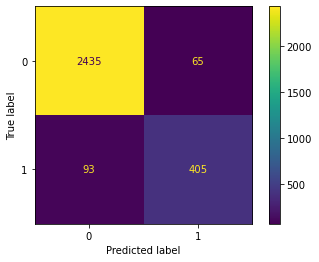

In [59]:
# Create & plot a confusion matrix
preds = rand_forest2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels = rand_forest2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rand_forest2.classes_)
disp.plot(values_format = '')

Plotting the feature importances for our second random forest model can be benefitial

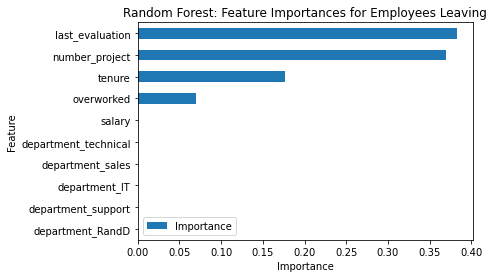

In [62]:
# Feature importances
feature_imp = rand_forest2.best_estimator_.feature_importances_

# Top 10 feature indices
top_10_indices = np.argpartition(rand_forest2.best_estimator_.feature_importances_, -10)[-10:]

# Labels for top 10 features
features = X.columns[top_10_indices]

# Make 'feature_imp' variable consist of top 10 features
feature_imp = feature_imp[top_10_indices]

y_df = pd.DataFrame({'Feature': features, 'Importance': feature_imp})
y_sort_df = y_df.sort_values('Importance')

fig = plt.figure()
ax1 = fig.add_subplot(111)
y_sort_df.plot(kind = 'barh', ax = ax1, x = 'Feature', y = 'Importance')
ax1.set_title("Random Forest: Feature Importances for Employees Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()